Plotting myelinated fibers structural parameters
================================================

This example shows how to plot structural parameters used in NRV's myelinated fiber models.

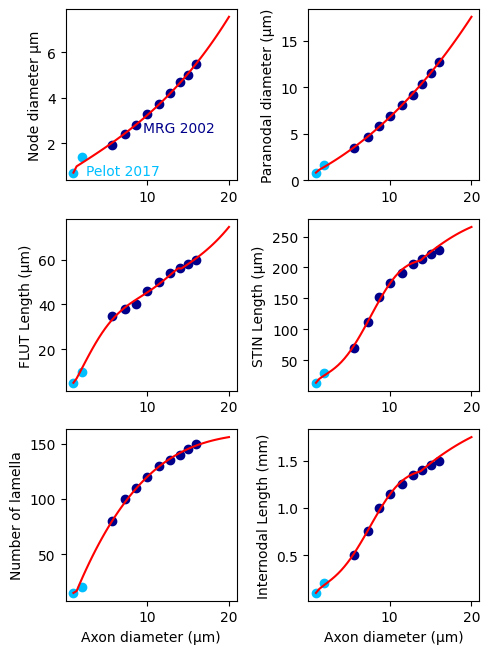

In [ ]:
import nrv
import matplotlib.pyplot as plt
import numpy as np

if __name__ == '__main__':
	fiberD  = np.asarray([5.7, 7.3, 8.7, 10.0, 11.5, 12.8, 14.0, 15.0, 16.0])
	fiberP  = np.asarray([1, 2])

	MRG_g = np.asarray([0.605, 0.630, 0.661, 0.690, 0.700, 0.719, 0.739, 0.767, 0.791])
	MRG_axonD = np.asarray([3.4, 4.6, 5.8, 6.9, 8.1, 9.2, 10.4, 11.5, 12.7])
	MRG_nodeD = np.asarray([1.9, 2.4, 2.8, 3.3, 3.7, 4.2, 4.7, 5.0, 5.5])
	MRG_paraD1 = np.asarray([ 1.9, 2.4, 2.8, 3.3, 3.7, 4.2, 4.7, 5.0, 5.5])
	MRG_paraD2 = np.asarray([ 3.4, 4.6, 5.8, 6.9, 8.1, 9.2, 10.4, 11.5, 12.7])
	MRG_deltax = np.asarray([ 500, 750, 1000, 1150, 1250, 1350, 1400, 1450, 1500])
	MRG_paralength2 = np.asarray([35, 38, 40, 46, 50, 54, 56, 58, 60])
	MRG_nl = np.asarray([ 80, 100, 110, 120, 130, 135, 140, 145, 150])

	P_g = np.asarray([0.565, 0.585])
	P_axonD = np.asarray([0.8, 1.6])
	P_nodeD = np.asarray([0.7, 1.4])
	P_paraD1 = np.asarray([0.7, 1.4])
	P_paraD2 = np.asarray([0.8, 1.6])
	P_deltax = np.asarray([100, 200])
	P_paralength2 = np.asarray([5, 10])
	P_nl = np.asarray([15, 20])

	paralength1 = 3
	nodelength = 1

	interlength_MRG = ((MRG_deltax-nodelength-(2*paralength1)-(2*MRG_paralength2))/6)
	interlength_P = ((P_deltax-nodelength-(2*paralength1)-(2*P_paralength2))/6)


	#interpolation
	diameters = np.linspace(1,20)
	g_interp = []
	axonD_interp = []
	nodeD_interp = []
	paraD1_interp = []
	paraD2_interp = []
	deltax_interp = []
	paralength2_interp = []
	nl_interp = []
	interlength_interp = []

	for diam in diameters:
		g, axonD, nodeD, paraD1, paraD2, deltax, paralength2, nl = nrv.get_MRG_parameters(diam)
		interlength_interp.append((deltax-nodelength-(2*paralength1)-(2*paralength2))/6)
		g_interp.append(g)
		axonD_interp.append(axonD)
		nodeD_interp.append(nodeD)
		paraD1_interp.append(paraD1)
		paraD2_interp.append(paraD2)
		deltax_interp.append(deltax)
		paralength2_interp.append(paralength2)
		nl_interp.append(nl)

	fig3, axs3 = plt.subplots(3, 2, figsize=(5, 5*1.33))
	axs3[0,0].scatter(fiberD,MRG_nodeD,color='darkblue')
	axs3[0,0].scatter(fiberP,P_nodeD,color='deepskyblue')
	axs3[0,0].plot(diameters,nodeD_interp,color='r')
	axs3[0,0].set_ylabel('Node diameter µm')
	axs3[0,0].text(2.5,0.6,"Pelot 2017",color='deepskyblue')
	axs3[0,0].text(9.5,2.5,"MRG 2002",color='darkblue')

	axs3[0,1].scatter(fiberD,MRG_paraD2,color='darkblue')
	axs3[0,1].scatter(fiberP,P_paraD2,color='deepskyblue')
	axs3[0,1].plot(diameters,paraD2_interp,color='r')
	axs3[0,1].set_ylabel('Paranodal diameter (µm)')

	axs3[1,0].scatter(fiberD,MRG_paralength2,color='darkblue')
	axs3[1,0].scatter(fiberP,P_paralength2,color='deepskyblue')
	axs3[1,0].plot(diameters,paralength2_interp,color='r')
	axs3[1,0].set_ylabel('FLUT Length (µm)')

	axs3[1,1].scatter(fiberD,interlength_MRG,color='darkblue')
	axs3[1,1].scatter(fiberP,interlength_P,color='deepskyblue')
	axs3[1,1].plot(diameters,interlength_interp,color='r')
	axs3[1,1].set_ylabel('STIN Length (µm)')

	axs3[2,0].scatter(fiberD,MRG_nl,color='darkblue')
	axs3[2,0].scatter(fiberP,P_nl,color='deepskyblue')
	axs3[2,0].plot(diameters,nl_interp,color='r')
	axs3[2,0].set_xlabel('Axon diameter (µm)')
	axs3[2,0].set_ylabel('Number of lamella')

	axs3[2,1].scatter(fiberD,MRG_deltax/1000,color='darkblue')
	axs3[2,1].scatter(fiberP,P_deltax/1000,color='deepskyblue')
	axs3[2,1].plot(diameters,np.array(deltax_interp)/1000,color='r')
	axs3[2,1].set_xlabel('Axon diameter (µm)')
	axs3[2,1].set_ylabel('Internodal Length (mm)')

	fig3.tight_layout()
